# It's needed to limit the number of classes in the dataset to focus on the most popular and represented ones

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import os

In [2]:
all_df = pd.read_csv(r'..\files\movieclips_final.tsv', sep='\t')
all_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,imdbid,title,clip_name,year,videoid,genre
0,0,8568,2413,tt0102316,Little Man Tate,The Math Magician Scene,1991.0,RjDv_swo0rY,['Drama']
1,1,14859,21696,tt0299977,Hero,A 's Death,2002.0,KeTBqolcrO8,"['Action', 'Adventure', 'History']"
2,2,12859,19518,tt0266489,Duplex,Riverdance,2003.0,rrejfviNpqE,['Comedy']
3,3,13901,906,tt0279493,Undercover Brother,Race Chase Scene,2002.0,RMWfAkUhGCM,"['Action', 'Comedy']"
4,4,14831,11717,tt0186566,Space Cowboys,Landing the Shuttle,2000.0,rKHW39mShF4,"['Action', 'Adventure', 'Thriller']"


## Removing unnecessary columns

In [3]:
all_df = all_df[['imdbid', 'title', 'clip_name', 'year', 'videoid', 'genre']]
all_df.head()

,imdbid,title,clip_name,year,videoid,genre
0,tt0102316,Little Man Tate,The Math Magician Scene,1991.0,RjDv_swo0rY,['Drama']
1,tt0299977,Hero,A 's Death,2002.0,KeTBqolcrO8,"['Action', 'Adventure', 'History']"
2,tt0266489,Duplex,Riverdance,2003.0,rrejfviNpqE,['Comedy']
3,tt0279493,Undercover Brother,Race Chase Scene,2002.0,RMWfAkUhGCM,"['Action', 'Comedy']"
4,tt0186566,Space Cowboys,Landing the Shuttle,2000.0,rKHW39mShF4,"['Action', 'Adventure', 'Thriller']"


## Creating a dictionary of unique genres and number of their appearances

In [4]:
genres_dict = {}

for index, row in all_df.iterrows():
    
    gen_list = row['genre'].replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(',')
    
    for gen in gen_list:
        
        if gen in genres_dict:
            genres_dict[gen] += 1
        else:
            genres_dict[gen] = 1

In [5]:
print(genres_dict)
print(len(genres_dict))

{'Drama': 6945, 'Action': 4340, 'Adventure': 3305, 'History': 309, 'Comedy': 7512, 'Thriller': 2214, 'Fantasy': 1468, 'Sci-Fi': 1436, 'Crime': 2976, 'Romance': 3083, 'Biography': 756, 'Western': 270, 'Horror': 1718, 'Mystery': 1195, 'Documentary': 124, 'War': 275, 'Musical': 283, 'Sport': 494, 'Animation': 699, 'Family': 1057, 'Music': 474, 'Short': 6, 'Film-Noir': 74}
23


## Sort the elements of dictionary and take 8 the most often reappearnig

In [6]:
genres_dict = sorted(genres_dict.items(), key=lambda x:x[1], reverse=True)[:8]
genres_dict = dict(genres_dict)
print(genres_dict)
genres_list = list(genres_dict.keys())
print(genres_list)

{'Comedy': 7512, 'Drama': 6945, 'Action': 4340, 'Adventure': 3305, 'Romance': 3083, 'Crime': 2976, 'Thriller': 2214, 'Horror': 1718}
['Comedy', 'Drama', 'Action', 'Adventure', 'Romance', 'Crime', 'Thriller', 'Horror']


## Remove the links from the dataframe that don't belong to any of these genres and remove the genres that we don't consider from each link genre list

In [7]:
valid_genres_df = pd.DataFrame(columns=all_df.columns)
for index, row in all_df.iterrows():
    
    gen_list = row['genre'].replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(',')
    new_gen_list = []
    
    for gen in gen_list:
        
        if gen in genres_list:
            new_gen_list.append(gen)
            
    if new_gen_list != []:
        new_row = copy.deepcopy(row)
        new_row['genre'] = new_gen_list
        valid_genres_df = valid_genres_df.append(new_row, ignore_index=True)

In [8]:
valid_genres_df

,imdbid,title,clip_name,year,videoid,genre
0,tt0102316,Little Man Tate,The Math Magician Scene,1991.0,RjDv_swo0rY,[Drama]
1,tt0299977,Hero,A 's Death,2002.0,KeTBqolcrO8,"[Action, Adventure]"
2,tt0266489,Duplex,Riverdance,2003.0,rrejfviNpqE,[Comedy]
3,tt0279493,Undercover Brother,Race Chase Scene,2002.0,RMWfAkUhGCM,"[Action, Comedy]"
4,tt0186566,Space Cowboys,Landing the Shuttle,2000.0,rKHW39mShF4,"[Action, Adventure, Thriller]"
...,...,...,...,...,...,...
16099,tt0363547,Dawn of the Dead,Blow My Head Off,2004.0,TS6_Y6r5r-8,"[Action, Horror]"
16100,tt0289879,The Butterfly Effect,Healing the Scars,2004.0,2L2dyDpd7LA,"[Drama, Thriller]"
16101,tt0094862,Child's Play,Charred Chucky Scene,1988.0,goyoOGbDjNM,"[Horror, Thriller]"
16102,tt0110622,Naked Gun 33 1/3: The Final Insult,The Untouchables,1994.0,YwM7NgPE5lw,"[Comedy, Crime]"


## At the end I obtain 16104 links

In [9]:
valid_genres_df.to_csv(r'..\files\movieclips_reduced.tsv', sep="\t")

## Display the distribution of the data

In [10]:
parent_folder = r'D:\frames'

existing_genres = {}

# Loop over subfolders in the parent folder
for subfolder in os.listdir(parent_folder):
    
    subfolder_path = os.path.join(parent_folder, subfolder)
        
    if subfolder not in existing_genres:
        existing_genres[subfolder] = 0
    
    if os.path.isdir(subfolder_path):
        # Loop over sub-subfolders in the subfolder
        
        for subsubfolder in os.listdir(subfolder_path):
            
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)
            # Loop over frames in the subfolder
            for frame in os.listdir(subsubfolder_path):
                
                existing_genres[subfolder] += 1

In [11]:
existing_genres = dict(sorted(existing_genres.items(), key=lambda x:x[1], reverse=True))

In [12]:
single_genre_list = []

for gen in existing_genres.keys():
    
    gen_list = gen.split('_')
    
    for g in gen_list:
        
        if g not in single_genre_list:
            single_genre_list.append(g)

In [13]:
existing_single_genres = {}

for gen in single_genre_list:
    
    if gen not in existing_single_genres:
        existing_single_genres[gen] = 0
    
    for g in existing_genres:
        
        if gen in g:
            existing_single_genres[gen] += existing_genres[g]

In [14]:
existing_single_genres = dict(sorted(existing_single_genres.items(), key=lambda x:x[1], reverse=True))

In [15]:
print(existing_genres)

{'Drama': 5931, 'Action_Adventure': 5319, 'Comedy': 4052, 'Adventure_Comedy': 3979, 'Comedy_Drama': 3090, 'Crime_Drama': 2329, 'Action_Drama': 1746, 'Comedy_Romance': 1740, 'Drama_Romance': 1683, 'Adventure_Drama': 1478, 'Horror_Thriller': 1361, 'Horror': 1327, 'Adventure': 1276, 'Action': 1248, 'Action_Thriller': 1204, 'Action_Comedy': 1160, 'Comedy_Horror': 1072, 'Action_Crime': 919, 'Comedy_Crime': 902, 'Action_Horror': 859, 'Drama_Horror': 793, 'Drama_Thriller': 679, 'Thriller': 455, 'Romance': 203, 'Romance_Thriller': 168, 'Crime': 156, 'Adventure_Horror': 154, 'Comedy_Thriller': 131, 'Crime_Horror': 109, 'Crime_Thriller': 80, 'Horror_Romance': 72, 'Action_Romance': 71, 'Crime_Romance': 56, 'Adventure_Thriller': 43}


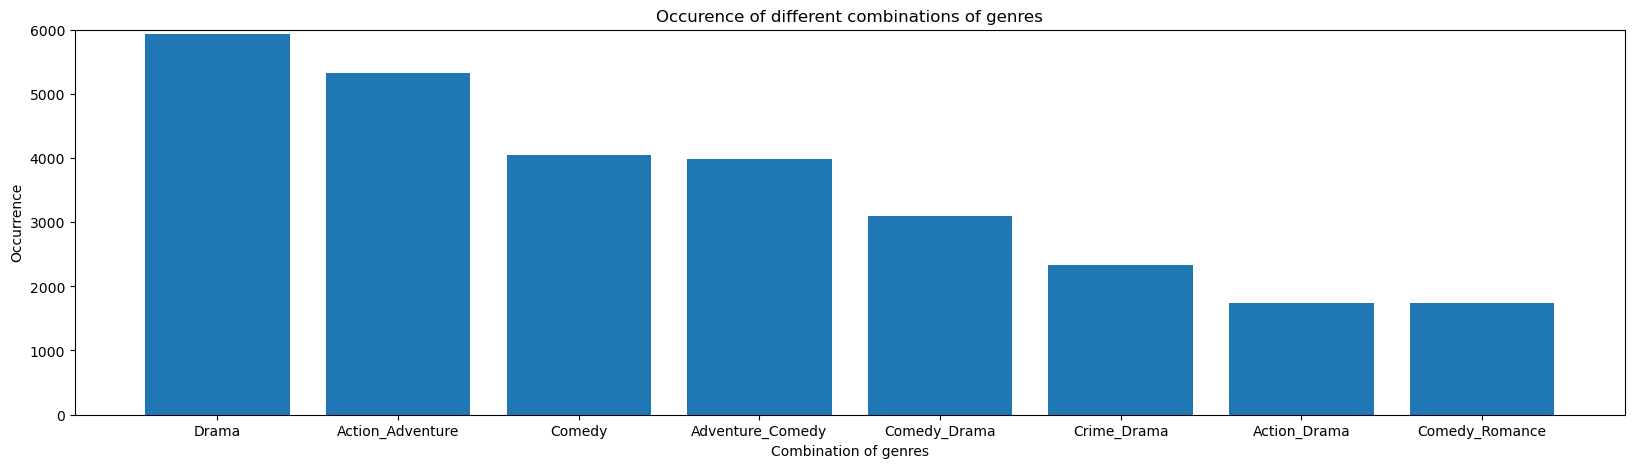

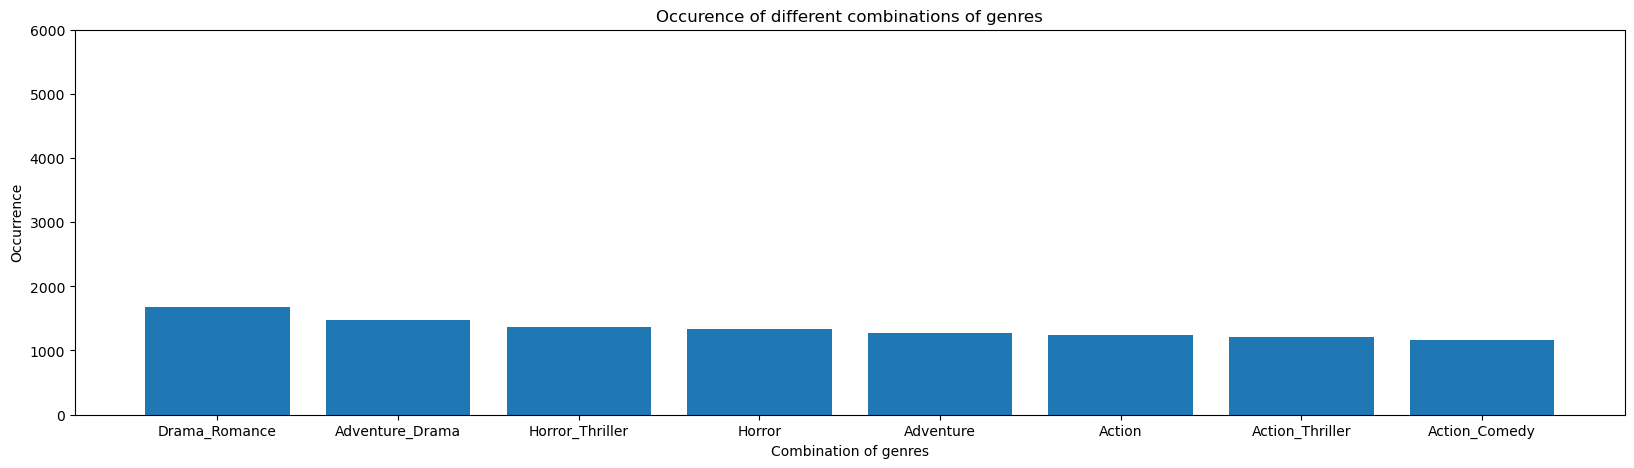

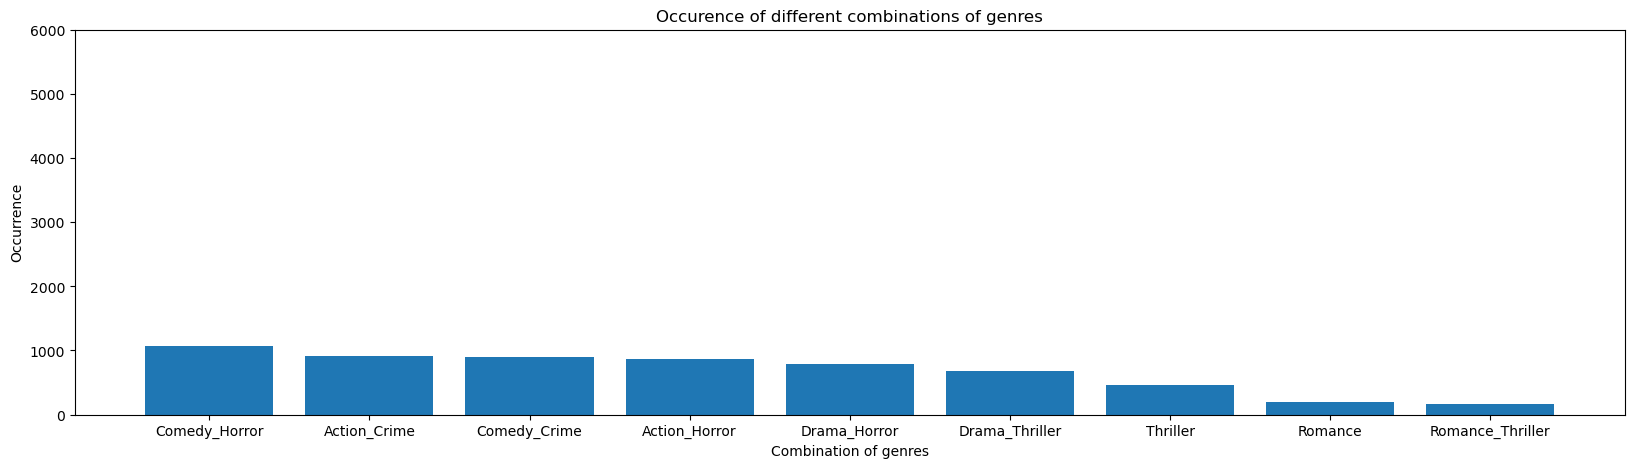

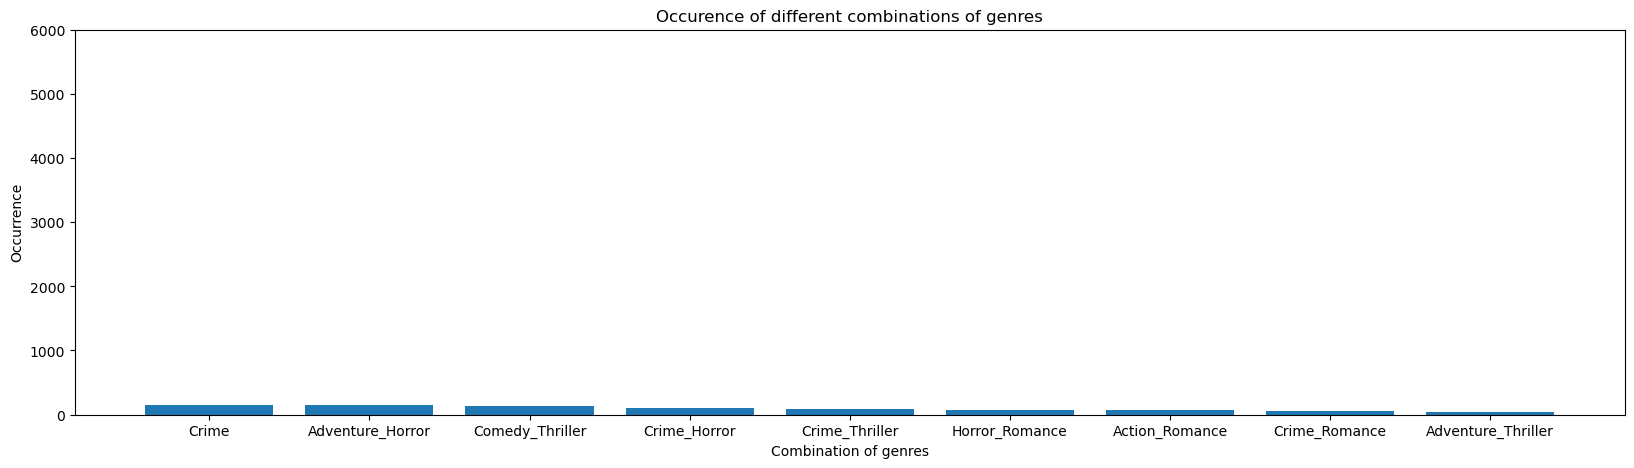

In [16]:
for start, end in [(0, 8), (8, 16), (16, 25), (25, len(existing_genres))]:
    
    plt.figure(figsize = (20, 5))

    plt.bar(list(existing_genres.keys())[start:end], list(existing_genres.values())[start:end])
    
    plt.ylim([0, 6000])
    
    plt.xlabel("Combination of genres")
    plt.ylabel("Occurrence")
    plt.title("Occurence of different combinations of genres")
    

Text(0.5, 1.0, 'Occurence of different combinations of genres')

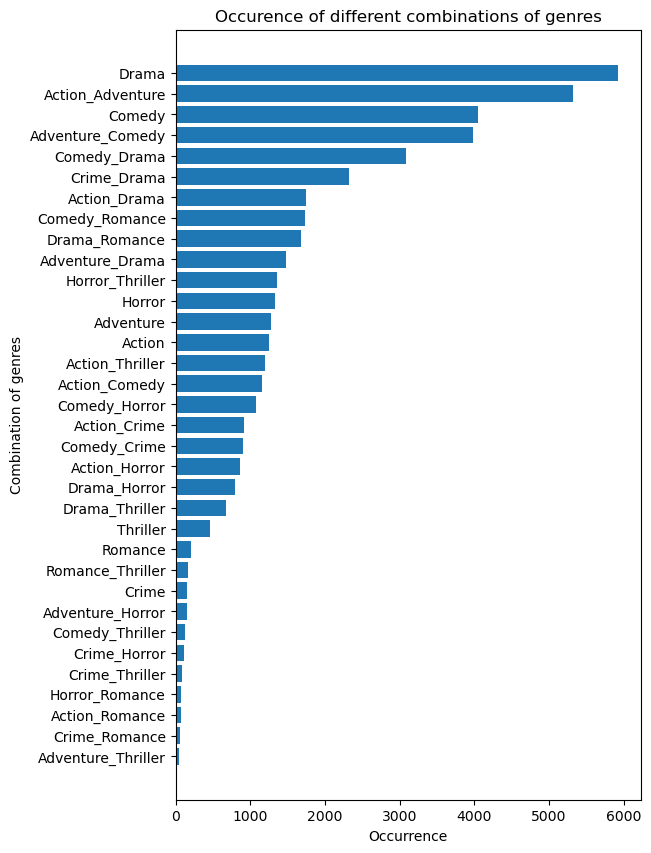

In [17]:
existing_genres = dict(sorted(existing_genres.items(), key=lambda x:x[1], reverse=False))
    
plt.figure(figsize = (6, 10))

plt.barh(list(existing_genres.keys()), list(existing_genres.values()))

plt.ylabel("Combination of genres")
plt.xlabel("Occurrence")
plt.title("Occurence of different combinations of genres")

Text(0.5, 1.0, 'Occurence of genres')

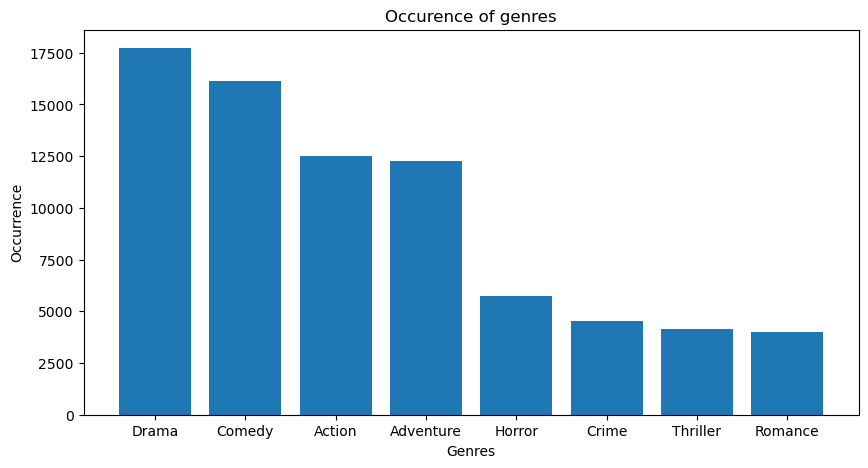

In [18]:
plt.figure(figsize = (10, 5))

plt.bar(existing_single_genres.keys(), existing_single_genres.values())
 
plt.xlabel("Genres")
plt.ylabel("Occurrence")
plt.title("Occurence of genres")